In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
import contextily as ctx
import numpy as np
import quilt3
from geopandas_view import view 
import libpysal as lps
import seaborn as sns
import tobler as tob
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("epa/ejscreen/ejscreen_2020.parquet", "./ejscreen_2020.parquet"),
ej = pd.read_parquet('ejscreen_2020.parquet')
ej.head()

100%|██████████| 146M/146M [00:06<00:00, 21.7MB/s] 


,OBJECTID,ID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,1,010010201001,636,636,418,294,294,104,0.163522,245,...,36.8 ppb (15%ile),54%ile,9.69 ug/m3 (86%ile),52%ile,4259428.0,28435.0,0,0,13443.155206,6.040790e+06
1,2,010010201002,1287,1287,885,471,485,278,0.216006,210,...,36.8 ppb (15%ile),36%ile,9.69 ug/m3 (86%ile),28%ile,5558385.0,0.0,0,0,11917.089598,7.834160e+06
2,3,010010202001,810,802,568,322,370,548,0.676543,402,...,36.8 ppb (16%ile),70%ile,9.71 ug/m3 (86%ile),72%ile,2058380.0,0.0,0,0,7770.915121,2.900774e+06
3,4,010010202002,1218,1016,875,397,482,670,0.550082,400,...,36.8 ppb (16%ile),67%ile,9.71 ug/m3 (86%ile),69%ile,1267299.0,5669.0,0,0,6506.804784,1.793332e+06
4,5,010010203001,2641,2641,1849,948,1049,899,0.340401,814,...,36.9 ppb (16%ile),51%ile,9.75 ug/m3 (86%ile),48%ile,3866515.0,9054.0,0,0,11070.367848,5.461602e+06


In [3]:
ej.rename(columns = {'ID' : 'GEOID'}, inplace = True)

In [4]:
ej

,OBJECTID,GEOID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,1,010010201001,636,636,418,294,294,104,0.163522,245,...,36.8 ppb (15%ile),54%ile,9.69 ug/m3 (86%ile),52%ile,4259428.0,28435.0,0,0,13443.155206,6.040790e+06
1,2,010010201002,1287,1287,885,471,485,278,0.216006,210,...,36.8 ppb (15%ile),36%ile,9.69 ug/m3 (86%ile),28%ile,5558385.0,0.0,0,0,11917.089598,7.834160e+06
2,3,010010202001,810,802,568,322,370,548,0.676543,402,...,36.8 ppb (16%ile),70%ile,9.71 ug/m3 (86%ile),72%ile,2058380.0,0.0,0,0,7770.915121,2.900774e+06
3,4,010010202002,1218,1016,875,397,482,670,0.550082,400,...,36.8 ppb (16%ile),67%ile,9.71 ug/m3 (86%ile),69%ile,1267299.0,5669.0,0,0,6506.804784,1.793332e+06
4,5,010010203001,2641,2641,1849,948,1049,899,0.340401,814,...,36.9 ppb (16%ile),51%ile,9.75 ug/m3 (86%ile),48%ile,3866515.0,9054.0,0,0,11070.367848,5.461602e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,220329,721537506011,699,699,511,250,502,699,1.000000,631,...,None,None,None,None,7628406.0,4527.0,0,0,19751.958143,8.486394e+06
220329,220330,721537506012,2432,2432,1555,670,1025,2432,1.000000,1906,...,None,None,None,None,1569471.0,0.0,0,0,6704.079316,1.744950e+06
220330,220331,721537506013,976,976,552,231,416,976,1.000000,758,...,None,None,None,None,1789160.0,0.0,0,0,7737.485130,1.989274e+06
220331,220332,721537506021,1707,1689,1481,573,849,1707,1.000000,1465,...,None,None,None,None,1136084.0,1997.0,0,0,5128.437876,1.265271e+06


In [5]:
ej.columns

Index(['OBJECTID', 'GEOID', 'ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS',
       'ACSTOTHH', 'ACSTOTHU', 'MINORPOP', 'MINORPCT', 'LOWINCOME',
       ...
       'T_OZONE', 'T_OZONE_D2', 'T_PM25', 'T_PM25_D2', 'AREALAND', 'AREAWATER',
       'NPL_CNT', 'TSDF_CNT', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=141)

In [6]:
geoms = gpd.read_parquet('s3://spatial-ucr/census/acs/acs_2018_bg.parquet')
geoms.head()

,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,n_nonhisp_black_persons,...,p_female_headed_families,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_veterans,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
020130001003,287.0,213.0,26.0,1164.0,154.0,218.0,280.0,29.0,234.0,4.0,...,10.357143,16.846652,0.287977,6.839453,41.324694,23.182145,1.007919,23.182145,4.463643,"MULTIPOLYGON (((-159.91033 54.81417, -159.9057..."
020160001001,175.0,157.0,25.0,807.0,64.0,146.0,127.0,10.0,203.0,41.0,...,7.874016,20.949432,4.231166,11.764706,48.710010,9.907121,3.405573,9.907121,12.074303,"MULTIPOLYGON (((179.38874 51.94192, 179.40456 ..."
020160002001,320.0,224.0,21.0,1884.0,256.0,302.0,248.0,3.0,270.0,91.0,...,1.209677,12.517385,4.218822,12.888271,1.205378,66.759388,0.834492,66.759388,2.781641,"MULTIPOLYGON (((-167.24289 53.85467, -167.2370..."
020160002002,468.0,335.0,29.0,2220.0,304.0,435.0,341.0,6.0,916.0,114.0,...,1.759531,34.908537,4.344512,15.472561,5.182927,33.574695,3.696646,33.574695,3.620427,"MULTIPOLYGON (((-167.90386 53.22286, -167.8910..."
020200001011,75.0,79.0,37.0,404.0,49.0,73.0,63.0,0.0,351.0,4.0,...,0.000000,75.646552,0.862069,0.000000,12.715517,3.232759,0.000000,3.232759,9.482759,"MULTIPOLYGON (((-149.47075 61.45923, -149.4505..."


In [7]:
ej = geoms.merge(ej, on='GEOID')

In [8]:
ej

,GEOID,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,020130001003,287.0,213.0,26.0,1164.0,154.0,218.0,280.0,29.0,234.0,...,None,None,None,None,1.178921e+09,4.114837e+09,0,0,1.026354e+06,1.615713e+10
1,020160001001,175.0,157.0,25.0,807.0,64.0,146.0,127.0,10.0,203.0,...,None,None,None,None,8.552028e+09,2.208385e+10,1,2,4.442060e+06,6.008803e+10
2,020160002001,320.0,224.0,21.0,1884.0,256.0,302.0,248.0,3.0,270.0,...,None,None,None,None,7.752357e+08,6.422767e+08,0,0,2.614006e+05,4.075118e+09
3,020160002002,468.0,335.0,29.0,2220.0,304.0,435.0,341.0,6.0,916.0,...,None,None,None,None,2.048247e+09,2.459880e+09,0,1,6.481758e+05,1.276803e+10
4,020200001011,75.0,79.0,37.0,404.0,49.0,73.0,63.0,0.0,351.0,...,None,None,None,None,5.402439e+07,1.640616e+07,0,0,1.053080e+05,3.072696e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,560419753004,100.0,179.0,36.0,490.0,156.0,96.0,159.0,0.0,538.0,...,52.3 ppb (90%ile),33%ile,6.29 ug/m3 (6%ile),43%ile,1.487227e+06,0.000000e+00,0,0,6.906249e+03,2.633693e+06
220329,560419753005,310.0,198.0,68.0,754.0,317.0,0.0,344.0,0.0,901.0,...,52.3 ppb (90%ile),22%ile,6.29 ug/m3 (6%ile),35%ile,1.592066e+07,0.000000e+00,0,0,2.242778e+04,2.816721e+07
220330,560419753006,344.0,213.0,21.0,1049.0,263.0,205.0,307.0,49.0,1299.0,...,52.3 ppb (90%ile),54%ile,6.29 ug/m3 (6%ile),55%ile,1.763853e+09,2.222040e+06,0,1,3.337718e+05,3.134317e+09
220331,560419754001,153.0,73.0,23.0,595.0,117.0,194.0,163.0,0.0,535.0,...,52.1 ppb (90%ile),66%ile,6.6 ug/m3 (9%ile),63%ile,1.347452e+07,0.000000e+00,0,0,2.577179e+04,2.387993e+07


In [9]:
ej.columns

Index(['GEOID', 'n_persons_under_18', 'n_persons_over_60', 'n_persons_over_75',
       'n_persons_over_15', 'n_married', 'n_widowed_divorced',
       'n_total_families', 'n_female_headed_families',
       'n_nonhisp_white_persons',
       ...
       'T_OZONE', 'T_OZONE_D2', 'T_PM25', 'T_PM25_D2', 'AREALAND', 'AREAWATER',
       'NPL_CNT', 'TSDF_CNT', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=177)

In [10]:
ca_ej = ej[ej.GEOID.str.startswith('06')]
ca_ej.head()

,GEOID,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
10297,060190045062,153.0,778.0,334.0,1567.0,313.0,447.0,389.0,0.0,1293.0,...,63 ppb (98%ile),19%ile,13.9 ug/m3 (99%ile),15%ile,1285301.0,0.0,0,1,6016.799236,2.009254e+06
10298,060190046011,365.0,630.0,233.0,1475.0,253.0,472.0,437.0,17.0,881.0,...,62.7 ppb (98%ile),64%ile,14 ug/m3 (99%ile),65%ile,1176829.0,0.0,0,1,8153.747224,1.839061e+06
10299,060190046012,377.0,428.0,141.0,1139.0,246.0,255.0,294.0,0.0,914.0,...,62.7 ppb (98%ile),41%ile,14 ug/m3 (99%ile),38%ile,639720.0,0.0,0,0,4000.409939,9.997658e+05
10300,060190046021,75.0,298.0,77.0,591.0,196.0,105.0,208.0,0.0,508.0,...,63 ppb (98%ile),32%ile,14.1 ug/m3 (99%ile),28%ile,808740.0,0.0,0,0,4523.951503,1.263881e+06
10301,060190046022,282.0,156.0,42.0,859.0,272.0,112.0,276.0,0.0,610.0,...,63 ppb (98%ile),43%ile,14.1 ug/m3 (99%ile),40%ile,1126026.0,0.0,0,0,6011.567284,1.759425e+06


In [11]:
ca_ej.columns

Index(['GEOID', 'n_persons_under_18', 'n_persons_over_60', 'n_persons_over_75',
       'n_persons_over_15', 'n_married', 'n_widowed_divorced',
       'n_total_families', 'n_female_headed_families',
       'n_nonhisp_white_persons',
       ...
       'T_OZONE', 'T_OZONE_D2', 'T_PM25', 'T_PM25_D2', 'AREALAND', 'AREAWATER',
       'NPL_CNT', 'TSDF_CNT', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=177)

In [12]:
pd.set_option("display.max_columns", None)
ca_ej.columns

Index(['GEOID', 'n_persons_under_18', 'n_persons_over_60', 'n_persons_over_75',
       'n_persons_over_15', 'n_married', 'n_widowed_divorced',
       'n_total_families', 'n_female_headed_families',
       'n_nonhisp_white_persons',
       ...
       'T_OZONE', 'T_OZONE_D2', 'T_PM25', 'T_PM25_D2', 'AREALAND', 'AREAWATER',
       'NPL_CNT', 'TSDF_CNT', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=177)

In [13]:
ca_ej

,GEOID,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,n_nonhisp_black_persons,n_hispanic_persons,n_native_persons,n_hawaiian_persons,n_asian_indian_persons,n_asian_persons,n_veterans,median_household_income,n_total_households,per_capita_income,n_poverty_families_children,n_total_pop,p_persons_under_18,p_persons_over_60,p_persons_over_75,p_married,p_widowed_divorced,p_female_headed_families,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_veterans,geometry,OBJECTID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,LOWINCPCT,LESSHS,LESSHSPCT,LINGISO,LINGISOPCT,UNDER5,UNDER5PCT,OVER64,OVER64PCT,PRE1960,PRE1960PCT,VULEOPCT,VULEO,DISPEO,DSLPM,CANCER,RESP,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,D_LDPNT_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_PWDIS_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_OZONE_2,D_PM25_2,STATE_NAME,ST_ABBREV,REGION,P_MINORPCT,P_LWINCPCT,P_LESHSPCT,P_LNGISPCT,P_UNDR5PCT,P_OVR64PCT,P_LDPNT,P_VULEOPCT,P_DSLPM,P_CANCR,P_RESP,P_PTRAF,P_PWDIS,P_PNPL,P_PRMP,P_PTSDF,P_OZONE,P_PM25,P_LDPNT_D2,P_DSLPM_D2,P_CANCR_D2,P_RESP_D2,P_PTRAF_D2,P_PWDIS_D2,P_PNPL_D2,P_PRMP_D2,P_PTSDF_D2,P_OZONE_D2,P_PM25_D2,B_MINORPCT,B_LWINCPCT,B_LESHSPCT,B_LNGISPCT,B_UNDR5PCT,B_OVR64PCT,B_LDPNT,B_VULEOPCT,B_DSLPM,B_CANCR,B_RESP,B_PTRAF,B_PWDIS,B_PNPL,B_PRMP,B_PTSDF,B_OZONE,B_PM25,B_LDPNT_D2,B_DSLPM_D2,B_CANCR_D2,B_RESP_D2,B_PTRAF_D2,B_PWDIS_D2,B_PNPL_D2,B_PRMP_D2,B_PTSDF_D2,B_OZONE_D2,B_PM25_D2,T_MINORPCT,T_LWINCPCT,T_LNGISPCT,T_LESHSPCT,T_UNDR5PCT,T_OVR64PCT,T_VULEOPCT,T_LDPNT,T_LDPNT_D2,T_DSLPM,T_DSLPM_D2,T_CANCR,T_CANCR_D2,T_RESP,T_RESP_D2,T_PTRAF,T_PTRAF_D2,T_PWDIS,T_PWDIS_D2,T_PNPL,T_PNPL_D2,T_PRMP,T_PRMP_D2,T_PTSDF,T_PTSDF_D2,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
10297,060190045062,153.0,778.0,334.0,1567.0,313.0,447.0,389.0,0.0,1293.0,12.0,240.0,12.0,30.0,103.0,103.0,194.0,58603.0,890.0,42553.0,0.0,1688.0,9.063981,46.090047,19.786730,19.974474,28.525846,0.000000,76.599526,0.710900,14.218009,0.710900,6.101896,1.777251,6.101896,11.492891,"MULTIPOLYGON (((-119.80844 36.81562, -119.8083...",12676,1688,1647,1413,890,981,395,0.234005,325,0.197328,80,0.056617,5,0.005618,0,0.000000,666,0.394550,85,0.086646,0.215667,364.045234,-233.846266,0.6809625236,51.6043299059,0.815336030135,995.956219,0.0,0.350372,0.198497,4.539403,62.9642915033,13.9271723288,-20.261909,-159.240543158,-12067.4798373,-190.663285857,-232900.642502,-0.0,-81.933221,-46.417897,-1061.522433,-14723.9644343,-3256.81723947,California,CA,9,41.86060936,33.5790686139,33.5180735219,46.2612989417,4.49891194889,97.9719072317,36.3912072922,34.207622022,80.7240763482,98.5610010361,98.882074056,81.749086715,33.6224355033,92.8653605387,38.0396879521,82.8631521358,98.1996809684,99.6030394913,34.884503871,14.3783288391,14.5196686012,10.8714850794,6.17031806732,73.4809053975,4.91622299116,33.0656791917,5.90740198381,19.3934473632,15.348341209,5,4,4,5,1,11,4,4,9,11,11,9,4,10,4,9,11,11,4,2,2,2,1,8,1,4,1,2,2,23% (41%ile),20% (33%ile),1% (46%ile),6% (33%ile),0% (4%ile),39% (97%ile),22% (34%ile),0.087 = fraction pre-1960 (36%ile),34%ile,0.681 ug/m3 (80%ile),14%ile,52 lifetime risk per million (98%ile),14%ile,0.82 (98%ile),10%ile,1000 daily vehicles/meters distance (81%ile),6%ile,0 toxicity-weighted concentration/meters dista...,73%ile,0.35 sites/km distance (92%ile),4%ile,0.2 facilities/km distance (38%ile),33%ile,4.5 facilities/km distance (82%ile),5%ile,63 ppb (98%ile),19%ile,13.9 ug/m3 (99%ile),15%ile,1285301.0,0.0,0,1,6016.799236,2.009254e+06
10298,060190046011,365.0,630.0,233.0,1475.0,253.0,472.0,437.0,17.0,881.0,5.0,806.0,31.0,0.0,0.0,0.0,165.0,56607.0,698.0,29213.0,37.0,1771.0,20.609825,35.573123,13.156409,17.152542,32.000000,3.890160,49.745906,0.282326,45.511011,1.750423,0.000000,0.000000,0.000000,9.316770,"MU

<AxesSubplot:>

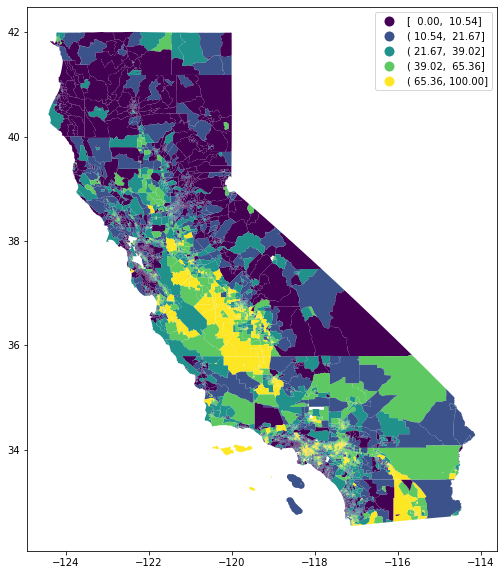

In [14]:
ca_ej.plot(column='p_hispanic_persons', scheme='Quantiles', k=5, legend=True)

In [15]:
D_RESP_2 = ca_ej.D_RESP_2
ca_ej.D_RESP_2 = D_RESP_2.replace(to_replace= "None", value=np.nan).astype(float)

/opt/tljh/user/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [16]:
riv_ej = ca_ej[ca_ej.GEOID.str.startswith("06065")]

In [17]:
riv_ej.shape

(1030, 177)

In [18]:
riv_ej

,GEOID,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,n_nonhisp_black_persons,n_hispanic_persons,n_native_persons,n_hawaiian_persons,n_asian_indian_persons,n_asian_persons,n_veterans,median_household_income,n_total_households,per_capita_income,n_poverty_families_children,n_total_pop,p_persons_under_18,p_persons_over_60,p_persons_over_75,p_married,p_widowed_divorced,p_female_headed_families,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_veterans,geometry,OBJECTID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,LOWINCPCT,LESSHS,LESSHSPCT,LINGISO,LINGISOPCT,UNDER5,UNDER5PCT,OVER64,OVER64PCT,PRE1960,PRE1960PCT,VULEOPCT,VULEO,DISPEO,DSLPM,CANCER,RESP,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,D_LDPNT_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_PWDIS_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_OZONE_2,D_PM25_2,STATE_NAME,ST_ABBREV,REGION,P_MINORPCT,P_LWINCPCT,P_LESHSPCT,P_LNGISPCT,P_UNDR5PCT,P_OVR64PCT,P_LDPNT,P_VULEOPCT,P_DSLPM,P_CANCR,P_RESP,P_PTRAF,P_PWDIS,P_PNPL,P_PRMP,P_PTSDF,P_OZONE,P_PM25,P_LDPNT_D2,P_DSLPM_D2,P_CANCR_D2,P_RESP_D2,P_PTRAF_D2,P_PWDIS_D2,P_PNPL_D2,P_PRMP_D2,P_PTSDF_D2,P_OZONE_D2,P_PM25_D2,B_MINORPCT,B_LWINCPCT,B_LESHSPCT,B_LNGISPCT,B_UNDR5PCT,B_OVR64PCT,B_LDPNT,B_VULEOPCT,B_DSLPM,B_CANCR,B_RESP,B_PTRAF,B_PWDIS,B_PNPL,B_PRMP,B_PTSDF,B_OZONE,B_PM25,B_LDPNT_D2,B_DSLPM_D2,B_CANCR_D2,B_RESP_D2,B_PTRAF_D2,B_PWDIS_D2,B_PNPL_D2,B_PRMP_D2,B_PTSDF_D2,B_OZONE_D2,B_PM25_D2,T_MINORPCT,T_LWINCPCT,T_LNGISPCT,T_LESHSPCT,T_UNDR5PCT,T_OVR64PCT,T_VULEOPCT,T_LDPNT,T_LDPNT_D2,T_DSLPM,T_DSLPM_D2,T_CANCR,T_CANCR_D2,T_RESP,T_RESP_D2,T_PTRAF,T_PTRAF_D2,T_PWDIS,T_PWDIS_D2,T_PNPL,T_PNPL_D2,T_PRMP,T_PRMP_D2,T_PTSDF,T_PTSDF_D2,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
22892,060650301011,300.0,167.0,39.0,1114.0,211.0,79.0,279.0,0.0,148.0,170.0,782.0,0.0,0.0,199.0,199.0,15.0,57903.0,360.0,18993.0,17.0,1329.0,22.573363,12.565839,2.934537,18.940754,7.091562,0.000000,11.136193,12.791573,58.841234,0.000000,14.973664,0.000000,14.973664,1.128668,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",23265,1329,1323,697,360,360,1181,0.888638,617,0.466364,197,0.282640,12,0.033333,76,0.057186,109,0.082017,196,0.544444,0.677501,900.399093,429.665798,1.0026002759,40.1864671116,0.625893503368,6222.003773,0.44060068527,0.686009,3.638879,7.927005,71.0338745098,12.2885115068,233.929156,430.783047181,17266.7504427,268.925031,2.673382e+06,189.311044843,294.754626,1563.501901,3405.963021,30520.8263452,5279.95309745,California,CA,9,89.4906557551,76.1904402074,89.1745531158,65.28863015,49.9741978265,21.4518615697,79.8010415077,88.419922848,93.3285794635,85.0181937103,90.064070056,98.1158529234,93.298010861,96.9494330852,97.3342563555,90.5154082946,99.7090145386,97.2129133439,92.1013060794,91.1530027677,85.5951500515,86.972203746,98.0886010887,96.8554587425,97.9742450853,96.3751693504,92.9366429296,91.4326638082,88.3464234556,9,8,9,7,5,3,8,9,10,9,10,11,10,11,11,10,11,11,10,10,9,9,11,11,11,11,10,10,9,89% (89%ile),47% (76%ile),3% (65%ile),28% (89%ile),6% (49%ile),8% (21%ile),68% (88%ile),0.54 = fraction pre-1960 (79%ile),92%ile,1 ug/m3 (93%ile),91%ile,40 lifetime risk per million (85%ile),85%ile,0.63 (90%ile),86%ile,6200 daily vehicles/meters distance (98%ile),98%ile,0.44 toxicity-weighted concentration/meters di...,96%ile,0.69 sites/km distance (96%ile),97%ile,3.6 facilities/km distance (97%ile),96%ile,7.9 facilities/km distance (90%ile),92%ile,71 ppb (99%ile),91%ile,12.3 ug/m3 (97%ile),88%ile,496238.0,0.0,0,0,3938.954918,7.237873e+05
22893,060650301031,122.0,132.0,53.0,642.0,85.0,144.0,151.0,18.0,263.0,6.0,420.0,0.0,0.0,57.0,57.0,53.0,46167.0,254.0,20433.0,39.0,751.0,16.245007,17.576565,7.057257,13.239875,22.429907,11.920530,35.019973,0.798935,55.925433,0.000000,7.589880,0.000000,7.589

<AxesSubplot:>

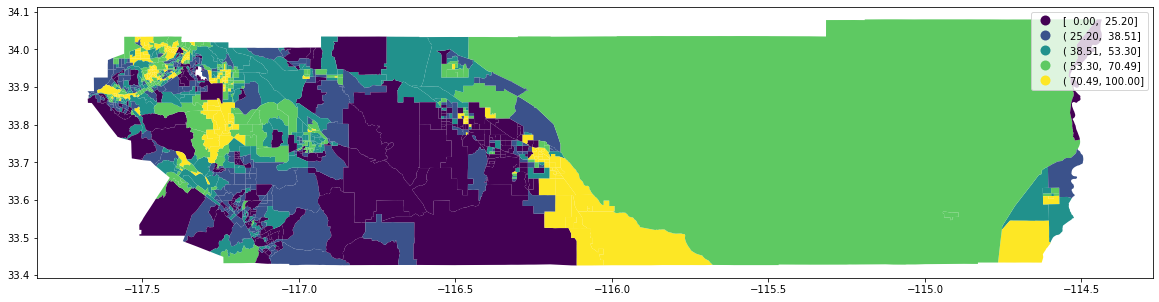

In [19]:
riv_ej.plot(column='p_hispanic_persons', scheme='Quantiles', k=5, legend=True)

In [20]:
## above shows hispanic population within riverside county

<AxesSubplot:>

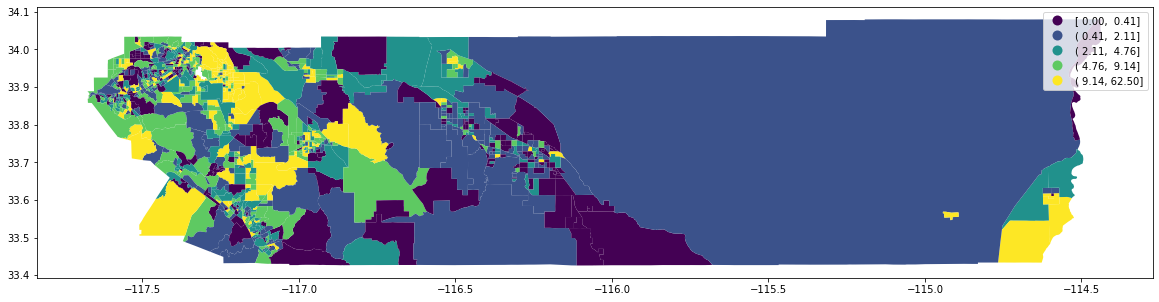

In [21]:
riv_ej.plot(column='p_nonhisp_black_persons', scheme='Quantiles', k=5, legend=True)

<AxesSubplot:>

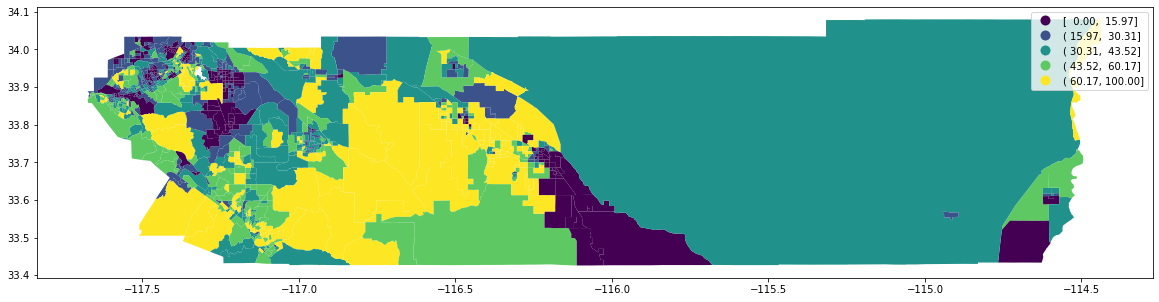

In [22]:
riv_ej.plot(column='p_nonhisp_white_persons', scheme='Quantiles', k=5, legend=True)

In [23]:
new_riverside = riv_ej[['D_RESP_2','MINORPCT','LOWINCPCT', 'RESP','geometry']]
new_riverside.head()

,D_RESP_2,MINORPCT,LOWINCPCT,RESP,geometry
22892,268.925031,0.888638,0.466364,0.625893503368,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
22893,96.574481,0.649800,0.472703,0.621077905091,"MULTIPOLYGON (((-117.36868 33.98814, -117.3684..."
22894,248.739003,0.729181,0.521531,0.621077905091,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
22895,446.902269,0.841341,0.390689,0.635734501791,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
22896,146.929484,0.894737,0.379437,0.635734501791,"MULTIPOLYGON (((-117.37605 34.00218, -117.3760..."


In [24]:
new_riverside.describe()

,D_RESP_2,MINORPCT,LOWINCPCT
count,1030.000000,1030.000000,1030.000000
mean,161.217384,0.612259,0.360719
std,239.451824,0.237403,0.197605
min,-397.647715,0.000000,0.000000
25%,-10.833675,0.449066,0.202769
50%,113.540281,0.630449,0.333192
75%,296.013932,0.807316,0.506338
max,1909.488471,1.000000,1.000000


In [25]:
districts = gpd.read_parquet('s3://spatial-ucr/nces/districts/school_districts_1819.parquet')

In [26]:
CA_dist = districts[districts.STATEFP == "06"]
CA_dist.head()

,STATEFP,ELSDLEA,SCSDLEA,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
100,06,None,29130,None,0629130,Oroville Union High School District,00,09,12,G5410,None,E,1.661957e+09,69687872.0,+39.6041742,-121.4309121,2019,2018-2019,"POLYGON ((-121.41109 39.92943, -121.41100 39.9..."
101,06,None,06005,None,0606005,Scott Valley Unified School District (9-12),00,09,12,G5410,A,F,1.665939e+09,4125720.0,+41.2663944,-123.1705167,2019,2018-2019,"POLYGON ((-122.94536 41.18142, -122.94603 41.1..."
102,06,None,02630,None,0602630,Anaheim Union High School District,00,07,12,G5410,None,E,1.054074e+08,442229.0,+33.8268024,-117.9645681,2019,2018-2019,"POLYGON ((-117.90866 33.86321, -117.90720 33.8..."
103,06,None,18060,None,0618060,Huntington Beach Union High School District,00,09,12,G5410,None,E,1.156663e+08,103525862.0,+33.6845747,-118.0212994,2019,2018-2019,"MULTIPOLYGON (((-118.06832 33.71677, -118.0685..."
104,06,None,30250,None,0630250,Petaluma Joint Union High School District,00,07,12,G5410,None,E,6.364750e+08,43379841.0,+38.1988275,-122.6342934,2019,2018-2019,"POLYGON ((-122.58311 38.35780, -122.58265 38.3..."


In [27]:
rusd_CA = districts[districts['STATEFP'].str.lower().str.contains('06')]
rusd = rusd_CA[rusd_CA['NAME'].str.lower().str.contains('riverside unified')]
rusd.head()

,STATEFP,ELSDLEA,SCSDLEA,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
1598,06,None,None,33150,0633150,Riverside Unified School District,00,KG,12,G5420,None,E,231195333.0,6617991.0,+33.9233125,-117.3778383,2019,2018-2019,"POLYGON ((-117.27942 34.00459, -117.27923 33.9..."


In [28]:
rusd_ej = gpd.overlay(riv_ej,rusd, how='intersection')

In [29]:
schools = gpd.read_parquet("s3://spatial-ucr/nces/schools/schools_1819.parquet")

In [30]:
seda = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_school_pool_gcs_4.0.csv",converters={"sedasch":str})
seda.sedasch=seda.sedasch.str.rjust(12, "0")

In [31]:
school_geoms = schools[['NCESSCH','CNTY','NMCNTY', 'geometry']]
school_geoms.head()

,NCESSCH,CNTY,NMCNTY,geometry
0,010000500870,01095,Marshall County,POINT (-86.20617 34.26019)
1,010000500871,01095,Marshall County,POINT (-86.20488 34.26223)
2,010000500879,01095,Marshall County,POINT (-86.22014 34.27332)
3,010000500889,01095,Marshall County,POINT (-86.22181 34.25270)
4,010000501616,01095,Marshall County,POINT (-86.19329 34.28985)


In [32]:
seda_merge = seda.merge(school_geoms, left_on="sedasch", right_on= "NCESSCH")

In [33]:
seda_merge= gpd.GeoDataFrame(seda_merge)

In [34]:
riv_schools = seda_merge[seda_merge['CNTY']=='06065']

In [35]:
riv_schools

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,mn_asmts,gcs_mn_avg_ol,gcs_mn_coh_ol,gcs_mn_grd_ol,gcs_mn_mth_ol,gcs_mn_avg_ol_se,gcs_mn_coh_ol_se,gcs_mn_grd_ol_se,gcs_mn_mth_ol_se,gcs_mn_avg_eb,gcs_mn_coh_eb,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
3593,060002702451,Tuscany Hills Elementary,6,CA,all,all,4.0,0,6622,54,122.629630,4.772446,-0.041251,0.961866,-0.506749,0.077878,0.026115,0.098192,0.155752,4.771729,-0.038360,0.966089,-0.456324,0.077796,0.025330,0.086952,0.147377,060002702451,06065,Riverside County,POINT (-117.28897 33.68620)
3594,060002702452,Donald Graham Elementary,6,CA,all,all,4.5,0,4450,52,85.576923,3.661487,-0.017878,0.817758,-0.169802,0.087250,0.027810,0.087991,0.162582,3.675263,-0.018267,0.851025,-0.155221,0.086146,0.026827,0.079418,0.153178,060002702452,06065,Riverside County,POINT (-117.25699 33.60594)
3595,060002705011,David A. Brown Middle,6,CA,all,all,7.0,0,14011,44,318.431818,5.973809,-0.039813,0.884628,-0.648164,0.082925,0.026588,0.094568,0.166505,5.982614,-0.039258,0.912412,-0.581169,0.081987,0.025659,0.084094,0.156177,060002705011,06065,Riverside County,POINT (-117.27617 33.59164)
3596,060002707605,William Collier Elementary,6,CA,all,all,4.0,0,5382,54,99.666667,2.827671,-0.014683,0.609988,-0.338116,0.076594,0.025283,0.097536,0.153270,2.829904,-0.013451,0.688857,-0.310582,0.076521,0.024574,0.086437,0.145329,060002707605,06065,Riverside County,POINT (-117.30098 33.61655)
3597,060002709490,Elsinore Elementary,6,CA,all,all,4.0,0,4931,54,91.314815,1.778749,-0.179799,0.840224,-0.486137,0.080178,0.026489,0.102132,0.160073,1.785586,-0.169781,0.838429,-0.423913,0.080091,0.025679,0.089638,0.151112,060002709490,06065,Riverside County,POINT (-117.33232 33.67245)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10569,069113511243,Lakeside Middle,6,CA,all,all,7.0,0,20487,36,569.083333,5.736532,-0.037282,0.691736,-0.265288,0.086356,0.031891,0.108269,0.185133,5.732865,-0.044337,0.778485,-0.219067,0.085706,0.029613,0.091334,0.170482,069113511243,06065,Riverside County,POINT (-117.17879 33.82704)
10570,069113511723,Val Verde Student Success Academy,6,CA,all,all,7.0,0,120,15,8.000000,2.941764,NaN,NaN,NaN,0.657300,NaN,NaN,NaN,2.680742,NaN,NaN,NaN,0.414201,NaN,NaN,NaN,069113511723,06065,Riverside County,POINT (-117.24697 33.83854)
10571,069113511724,Triple Crown Elementary,6,CA,all,all,4.0,0,7266,54,134.555556,3.223251,0.010371,0.864870,-0.147217,0.075874,0.025054,0.097569,0.151692,3.225183,0.010050,0.893969,-0.135260,0.075798,0.024357,0.086503,0.143969,069113511724,06065,Riverside County,POINT (-117.21533 33.81624)
10572,069113511725,March Middle,6,CA,all,all,7.0,0,11838,44,269.045455,5.377744,-0.043705,1.077585,-0.144536,0.084865,0.027360,0.097215,0.172112,5.374340,-0.040061,1.062443,-0.138413,0.083893,0.026352,0.085914,0.160757,069113511725,06065,Riverside County,POINT (-117.23373 33.89077)


In [36]:
rusd_schools = gpd.overlay(riv_schools, rusd, how='intersection')

In [37]:
rusd_pts= rusd_schools[['gcs_mn_avg_ol','geometry']]
rusd_pts.head()

,gcs_mn_avg_ol,geometry
0,8.098470,POINT (-117.30967 33.88970)
1,4.939048,POINT (-117.30644 33.88844)
2,3.253884,POINT (-117.43514 33.94446)
3,3.960433,POINT (-117.36408 33.95469)
4,3.599937,POINT (-117.37885 33.98955)


In [68]:
rusd_ej

,GEOID_1,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,n_nonhisp_black_persons,n_hispanic_persons,n_native_persons,n_hawaiian_persons,n_asian_indian_persons,n_asian_persons,n_veterans,median_household_income,n_total_households,per_capita_income,n_poverty_families_children,n_total_pop,p_persons_under_18,p_persons_over_60,p_persons_over_75,p_married,p_widowed_divorced,p_female_headed_families,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_veterans,OBJECTID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,LOWINCPCT,LESSHS,LESSHSPCT,LINGISO,LINGISOPCT,UNDER5,UNDER5PCT,OVER64,OVER64PCT,PRE1960,PRE1960PCT,VULEOPCT,VULEO,DISPEO,DSLPM,CANCER,RESP,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,D_LDPNT_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_PWDIS_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_OZONE_2,D_PM25_2,STATE_NAME,ST_ABBREV,REGION,P_MINORPCT,P_LWINCPCT,P_LESHSPCT,P_LNGISPCT,P_UNDR5PCT,P_OVR64PCT,P_LDPNT,P_VULEOPCT,P_DSLPM,P_CANCR,P_RESP,P_PTRAF,P_PWDIS,P_PNPL,P_PRMP,P_PTSDF,P_OZONE,P_PM25,P_LDPNT_D2,P_DSLPM_D2,P_CANCR_D2,P_RESP_D2,P_PTRAF_D2,P_PWDIS_D2,P_PNPL_D2,P_PRMP_D2,P_PTSDF_D2,P_OZONE_D2,P_PM25_D2,B_MINORPCT,B_LWINCPCT,B_LESHSPCT,B_LNGISPCT,B_UNDR5PCT,B_OVR64PCT,B_LDPNT,B_VULEOPCT,B_DSLPM,B_CANCR,B_RESP,B_PTRAF,B_PWDIS,B_PNPL,B_PRMP,B_PTSDF,B_OZONE,B_PM25,B_LDPNT_D2,B_DSLPM_D2,B_CANCR_D2,B_RESP_D2,B_PTRAF_D2,B_PWDIS_D2,B_PNPL_D2,B_PRMP_D2,B_PTSDF_D2,B_OZONE_D2,B_PM25_D2,T_MINORPCT,T_LWINCPCT,T_LNGISPCT,T_LESHSPCT,T_UNDR5PCT,T_OVR64PCT,T_VULEOPCT,T_LDPNT,T_LDPNT_D2,T_DSLPM,T_DSLPM_D2,T_CANCR,T_CANCR_D2,T_RESP,T_RESP_D2,T_PTRAF,T_PTRAF_D2,T_PWDIS,T_PWDIS_D2,T_PNPL,T_PNPL_D2,T_PRMP,T_PRMP_D2,T_PTSDF,T_PTSDF_D2,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area,STATEFP,ELSDLEA,SCSDLEA,UNSDLEA,GEOID_2,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
0,060650301011,300.0,167.0,39.0,1114.0,211.0,79.0,279.0,0.0,148.0,170.0,782.0,0.0,0.0,199.0,199.0,15.0,57903.0,360.0,18993.0,17.0,1329.0,22.573363,12.565839,2.934537,18.940754,7.091562,0.000000,11.136193,12.791573,58.841234,0.000000,14.973664,0.000000,14.973664,1.128668,23265,1329,1323,697,360,360,1181,0.888638,617,0.466364,197,0.282640,12,0.033333,76,0.057186,109,0.082017,196,0.544444,0.677501,900.399093,429.665798,1.0026002759,40.1864671116,0.625893503368,6222.003773,0.44060068527,0.686009,3.638879,7.927005,71.0338745098,12.2885115068,233.929156,430.783047181,17266.7504427,268.925031,2.673382e+06,189.311044843,294.754626,1563.501901,3405.963021,30520.8263452,5279.95309745,California,CA,9,89.4906557551,76.1904402074,89.1745531158,65.28863015,49.9741978265,21.4518615697,79.8010415077,88.419922848,93.3285794635,85.0181937103,90.064070056,98.1158529234,93.298010861,96.9494330852,97.3342563555,90.5154082946,99.7090145386,97.2129133439,92.1013060794,91.1530027677,85.5951500515,86.972203746,98.0886010887,96.8554587425,97.9742450853,96.3751693504,92.9366429296,91.4326638082,88.3464234556,9,8,9,7,5,3,8,9,10,9,10,11,10,11,11,10,11,11,10,10,9,9,11,11,11,11,10,10,9,89% (89%ile),47% (76%ile),3% (65%ile),28% (89%ile),6% (49%ile),8% (21%ile),68% (88%ile),0.54 = fraction pre-1960 (79%ile),92%ile,1 ug/m3 (93%ile),91%ile,40 lifetime risk per million (85%ile),85%ile,0.63 (90%ile),86%ile,6200 daily vehicles/meters distance (98%ile),98%ile,0.44 toxicity-weighted concentration/meters di...,96%ile,0.69 sites/km distance (96%ile),97%ile,3.6 facilities/km distance (97%ile),96%ile,7.9 facilities/km distance (90%ile),92%ile,71 ppb (99%ile),91%ile,12.3 ug/m3 (97%ile),88%ile,496238.0,0.0,0,0,3938.954918,7.237873e+05,06,None,None,33150,0633150,Riverside Unified School District,00,KG,12,G5420,None,E,231195333.0,6617991.0,+33.9233125,-117.3778383,2019,2018-2019,"POLYGON ((-117.35750 33.99

In [69]:
riverside_racial= rusd_ej[['D_RESP_2','p_nonhisp_white_persons','p_nonhisp_black_persons','p_hispanic_persons','median_household_income','geometry']]

<AxesSubplot:>

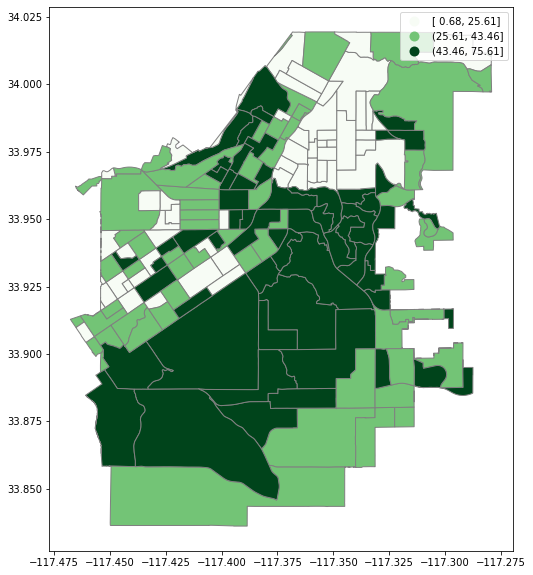

In [70]:
riverside_racial.plot(column='p_nonhisp_white_persons', cmap='Greens', scheme='Quantiles', k=3,edgecolor='grey',
        legend=True)

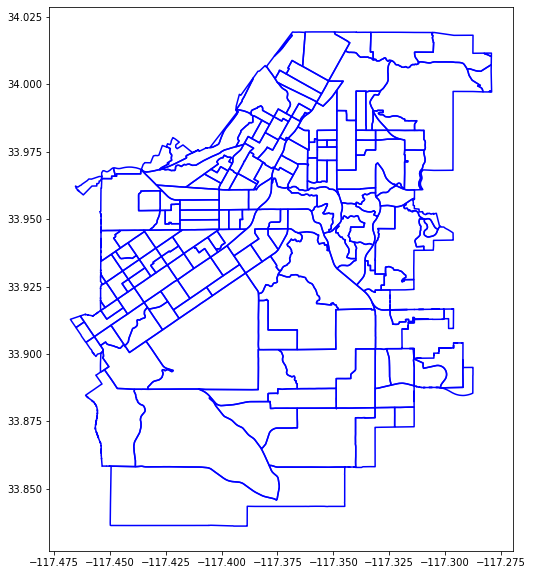

In [71]:
base = riverside_racial.geometry.boundary.plot(edgecolor='blue')

In [72]:
riverside_racial

,D_RESP_2,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,median_household_income,geometry
0,268.925031,11.136193,12.791573,58.841234,57903.0,"POLYGON ((-117.35750 33.99337, -117.35741 33.9..."
1,96.574481,35.019973,0.798935,55.925433,46167.0,"POLYGON ((-117.36868 33.98814, -117.36845 33.9..."
2,248.739003,27.081923,0.744753,69.939066,44583.0,"POLYGON ((-117.37502 34.00081, -117.37484 34.0..."
3,446.902269,15.865922,4.618250,62.234637,63258.0,"POLYGON ((-117.37638 34.01055, -117.37622 34.0..."
4,146.929484,10.526316,0.000000,81.150551,50341.0,"POLYGON ((-117.37605 34.00218, -117.37603 34.0..."
...,...,...,...,...,...,...
169,-66.298475,68.381113,4.131535,20.910624,74741.0,"MULTIPOLYGON (((-117.30179 33.88744, -117.2998..."
170,121.879223,35.810163,7.430489,36.912752,76115.0,"POLYGON ((-117.31320 33.94256, -117.31258 33.9..."
171,96.819742,46.149554,14.453125,29.631696,62361.0,"POLYGON ((-117.31843 33.95449, -117.31839 33.9..."
172,0.914070,42.376446,12.407992,15.457413,139375.0,"POLYGON ((-117.30941 33.94511, -117.30939 33.9..."


In [74]:
schools_vd

,geometry
0,"POLYGON ((-117.30644 33.89319, -117.31231 33.8..."
1,"POLYGON ((-117.30644 33.86654, -117.31231 33.8..."
2,"POLYGON ((-117.42873 33.94095, -117.43958 33.9..."
3,"POLYGON ((-117.37248 33.96665, -117.37027 33.9..."
4,"POLYGON ((-117.41224 33.99312, -117.42849 34.0..."
5,"POLYGON ((-117.34983 33.95094, -117.33137 33.9..."
6,"POLYGON ((-117.37248 33.96665, -117.37504 33.9..."
7,"POLYGON ((-117.41309 33.91793, -117.44180 33.9..."
8,"POLYGON ((-117.36421 33.96694, -117.34578 33.9..."
9,"POLYGON ((-117.37104 33.99393, -117.36132 34.0..."


<AxesSubplot:>

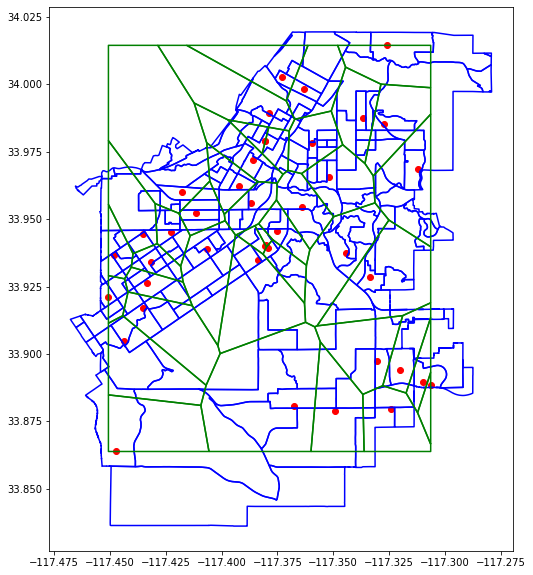

In [77]:
base = riverside_racial.geometry.boundary.plot(edgecolor='blue')
schools_vd.geometry.boundary.plot(ax=base, edgecolor='green')
rusd_pts.plot(color='red', ax=base)

<AxesSubplot:>

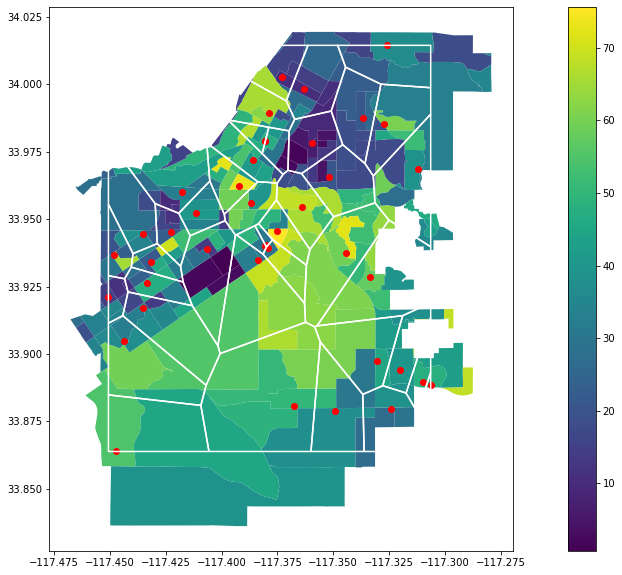

In [79]:
base  = riverside_racial.plot(column='p_nonhisp_white_persons', legend=True)
schools_vd.geometry.boundary.plot(ax=base, edgecolor='white')
rusd_pts.plot(color='red', ax=base)

<AxesSubplot:>

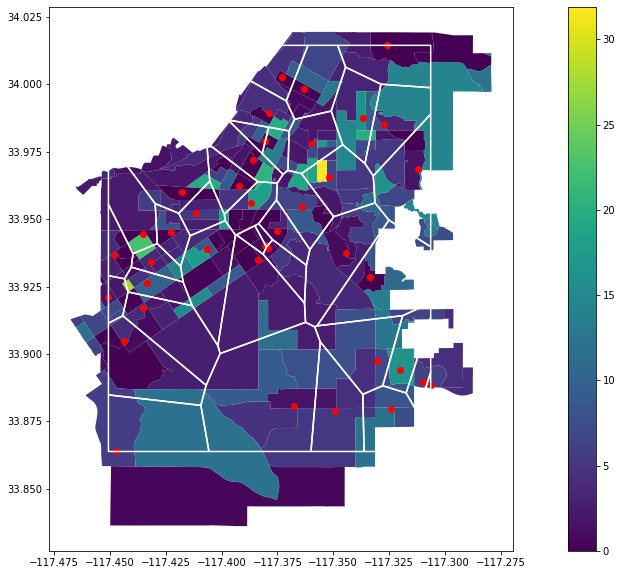

In [80]:
base  = riverside_racial.plot(column='p_nonhisp_black_persons', legend=True)
schools_vd.geometry.boundary.plot(ax=base, edgecolor='white')
rusd_pts.plot(color='red', ax=base)

<AxesSubplot:>

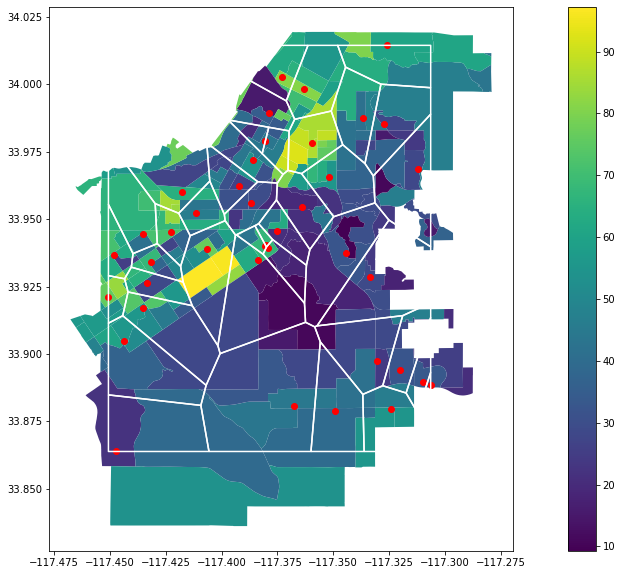

In [81]:
base  = riverside_racial.plot(column='p_hispanic_persons', legend=True)
schools_vd.geometry.boundary.plot(ax=base, edgecolor='white')
rusd_pts.plot(color='red', ax=base)

<AxesSubplot:>

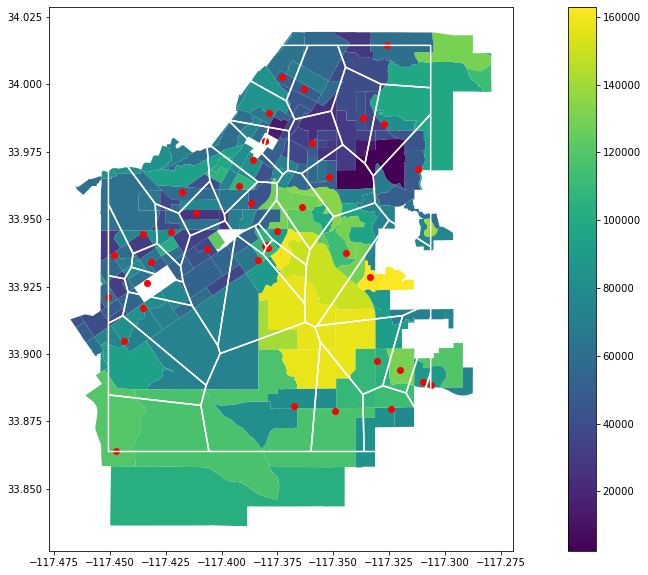

In [82]:
base  = riverside_racial.plot(column='median_household_income', legend=True)
schools_vd.geometry.boundary.plot(ax=base, edgecolor='white')
rusd_pts.plot(color='red', ax=base)

<AxesSubplot:>

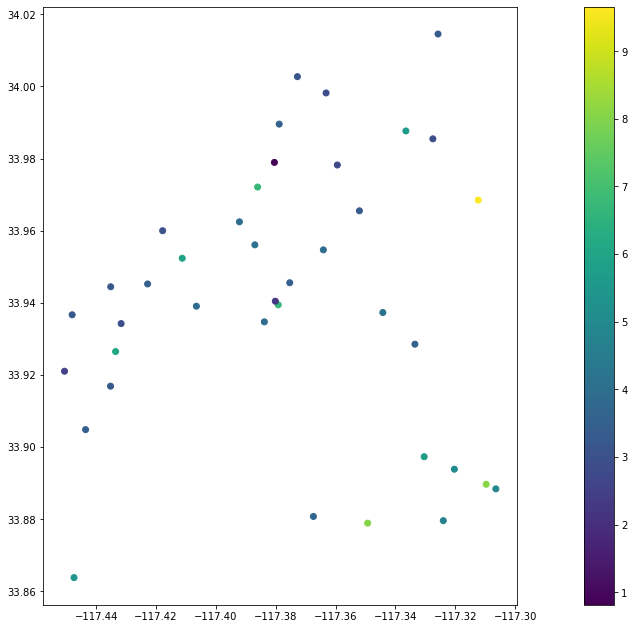

In [38]:
rusd_pts.plot(column='gcs_mn_avg_ol', legend=True, figsize=(24,11))

<AxesSubplot:>

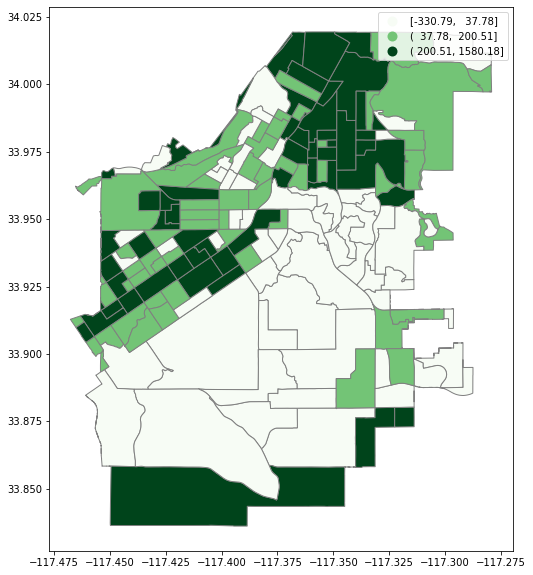

In [39]:
EJ_RUSD= rusd_ej[['D_RESP_2','geometry']]
EJ_RUSD.plot(column='D_RESP_2', cmap='Greens', scheme='Quantiles', k=3,edgecolor='grey',
        legend=True)

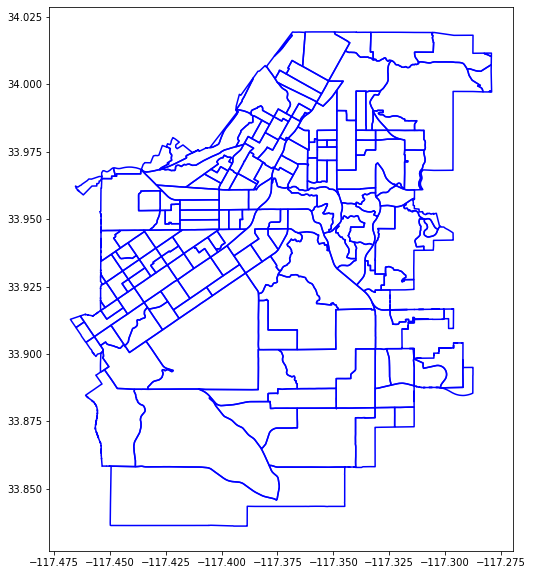

In [40]:
base = EJ_RUSD.geometry.boundary.plot(edgecolor='blue')

In [41]:
EJ_RUSD

,D_RESP_2,geometry
0,268.925031,"POLYGON ((-117.35750 33.99337, -117.35741 33.9..."
1,96.574481,"POLYGON ((-117.36868 33.98814, -117.36845 33.9..."
2,248.739003,"POLYGON ((-117.37502 34.00081, -117.37484 34.0..."
3,446.902269,"POLYGON ((-117.37638 34.01055, -117.37622 34.0..."
4,146.929484,"POLYGON ((-117.37605 34.00218, -117.37603 34.0..."
...,...,...
169,-66.298475,"MULTIPOLYGON (((-117.30179 33.88744, -117.2998..."
170,121.879223,"POLYGON ((-117.31320 33.94256, -117.31258 33.9..."
171,96.819742,"POLYGON ((-117.31843 33.95449, -117.31839 33.9..."
172,0.914070,"POLYGON ((-117.30941 33.94511, -117.30939 33.9..."


In [75]:
schools_vd

,geometry
0,"POLYGON ((-117.30644 33.89319, -117.31231 33.8..."
1,"POLYGON ((-117.30644 33.86654, -117.31231 33.8..."
2,"POLYGON ((-117.42873 33.94095, -117.43958 33.9..."
3,"POLYGON ((-117.37248 33.96665, -117.37027 33.9..."
4,"POLYGON ((-117.41224 33.99312, -117.42849 34.0..."
5,"POLYGON ((-117.34983 33.95094, -117.33137 33.9..."
6,"POLYGON ((-117.37248 33.96665, -117.37504 33.9..."
7,"POLYGON ((-117.41309 33.91793, -117.44180 33.9..."
8,"POLYGON ((-117.36421 33.96694, -117.34578 33.9..."
9,"POLYGON ((-117.37104 33.99393, -117.36132 34.0..."


In [43]:
rusd_pts

,gcs_mn_avg_ol,geometry
0,8.098470,POINT (-117.30967 33.88970)
1,4.939048,POINT (-117.30644 33.88844)
2,3.253884,POINT (-117.43514 33.94446)
3,3.960433,POINT (-117.36408 33.95469)
4,3.599937,POINT (-117.37885 33.98955)
5,4.123073,POINT (-117.34421 33.93732)
6,6.686605,POINT (-117.38604 33.97211)
7,6.008160,POINT (-117.43351 33.92649)
8,3.324820,POINT (-117.35204 33.96551)
9,2.883472,POINT (-117.36318 33.99819)


<AxesSubplot:>

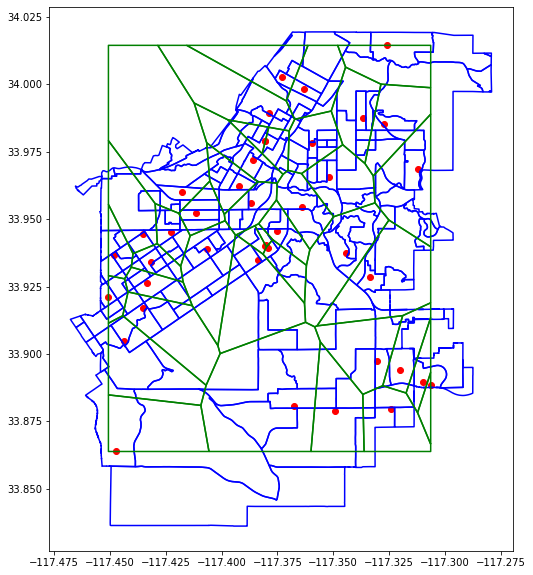

In [76]:
base = EJ_RUSD.geometry.boundary.plot(edgecolor='blue')
schools_vd.geometry.boundary.plot(ax=base, edgecolor='green')
rusd_pts.plot(color='red', ax=base)

<AxesSubplot:>

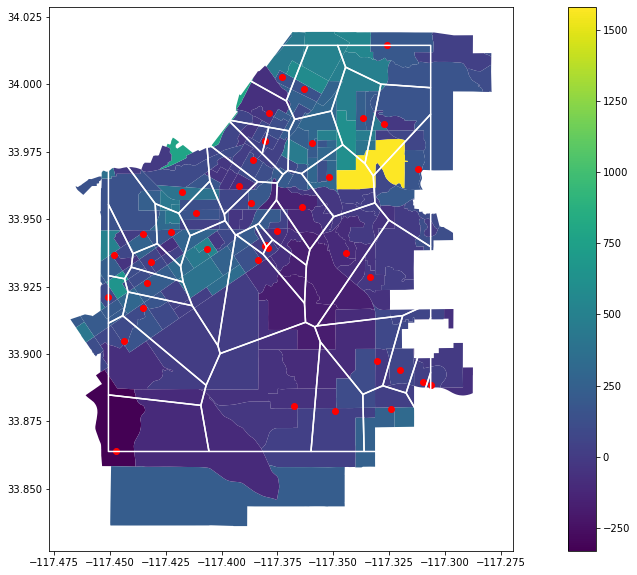

In [78]:
base  = EJ_RUSD.plot(column='D_RESP_2', legend=True)
schools_vd.geometry.boundary.plot(ax=base, edgecolor='white')
rusd_pts.plot(color='red', ax=base)

In [46]:
rusd_sch= gpd.sjoin(rusd_pts, EJ_RUSD, how='left', op='within')
rusd_sch.head()

,gcs_mn_avg_ol,geometry,index_right,D_RESP_2
0,8.098470,POINT (-117.30967 33.88970),135,23.698113
1,4.939048,POINT (-117.30644 33.88844),135,23.698113
2,3.253884,POINT (-117.43514 33.94446),85,261.324237
3,3.960433,POINT (-117.36408 33.95469),36,-142.849901
4,3.599937,POINT (-117.37885 33.98955),6,-62.781118


In [47]:
rusd_pts['D_RESP_2'] = rusd_sch.D_RESP_2
rusd_pts.head()

/opt/tljh/user/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,gcs_mn_avg_ol,geometry,D_RESP_2
0,8.098470,POINT (-117.30967 33.88970),23.698113
1,4.939048,POINT (-117.30644 33.88844),23.698113
2,3.253884,POINT (-117.43514 33.94446),261.324237
3,3.960433,POINT (-117.36408 33.95469),-142.849901
4,3.599937,POINT (-117.37885 33.98955),-62.781118


In [48]:
rusd_pts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [49]:
x = rusd_pts.geometry.x
y = rusd_pts.geometry.y
cents = np.array([x,y]).T
cents

array([[-117.309672,   33.8897  ],
       [-117.306444,   33.888437],
       [-117.435142,   33.944462],
       [-117.364084,   33.954691],
       [-117.378847,   33.989554],
       [-117.344212,   33.937322],
       [-117.386042,   33.972106],
       [-117.433511,   33.926494],
       [-117.35204 ,   33.965514],
       [-117.363176,   33.998189],
       [-117.379166,   33.939457],
       [-117.443541,   33.90486 ],
       [-117.43521 ,   33.916901],
       [-117.325771,   34.014527],
       [-117.327483,   33.98547 ],
       [-117.448032,   33.936693],
       [-117.42281 ,   33.945237],
       [-117.450581,   33.921052],
       [-117.35942 ,   33.978215],
       [-117.406513,   33.939076],
       [-117.392137,   33.962463],
       [-117.431664,   33.934256],
       [-117.417794,   33.959997],
       [-117.386974,   33.956083],
       [-117.411247,   33.952365],
       [-117.3365  ,   33.987656],
       [-117.375315,   33.945572],
       [-117.383802,   33.934734],
       [-117.367417,

In [73]:
schools_vd, school_cents = lps.cg.voronoi_frames(cents)

<AxesSubplot:>

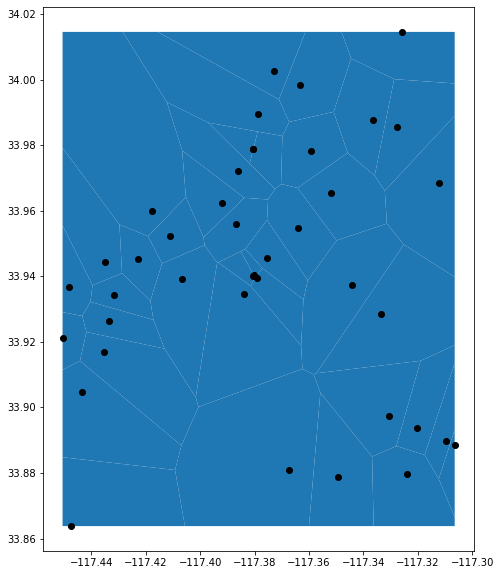

In [51]:
base = schools_vd.plot()
rusd_pts.plot(ax=base, color='black')

<AxesSubplot:>

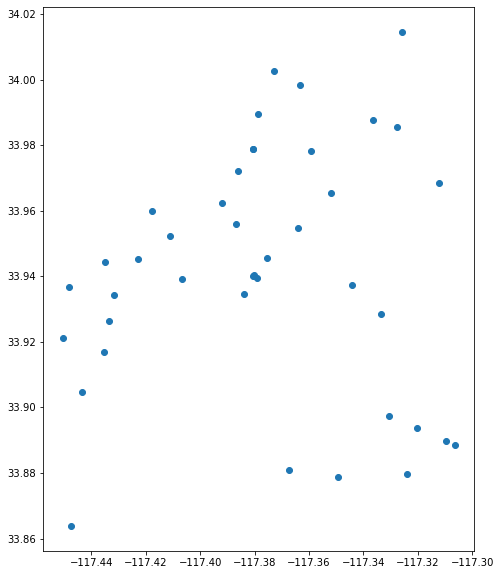

In [52]:
rusd_pts.plot()

<AxesSubplot:>

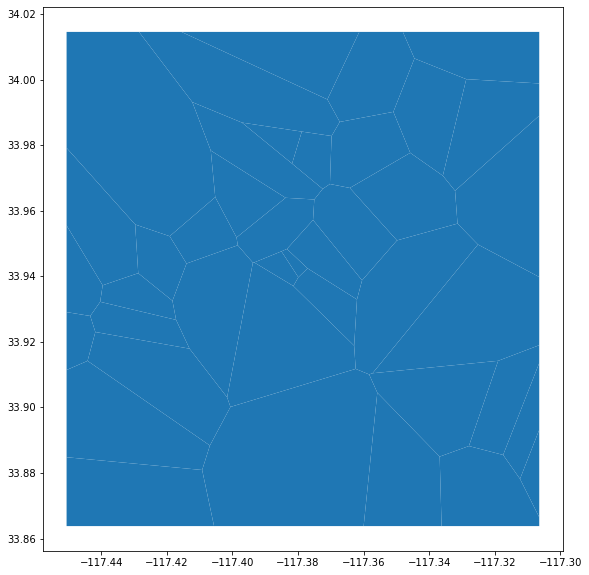

In [53]:
schools_vd.plot()

<AxesSubplot:>

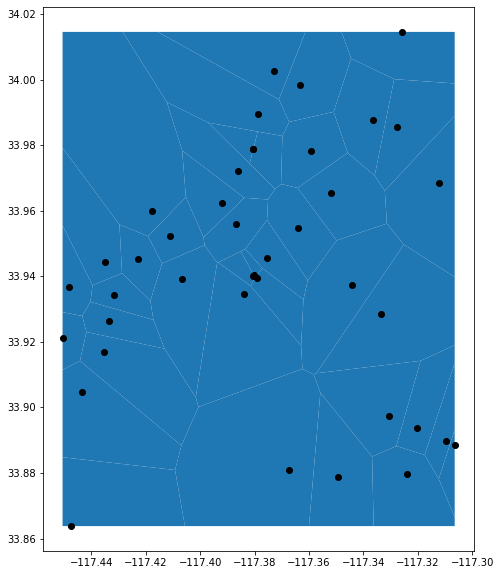

In [54]:
base = schools_vd.plot()
rusd_pts.plot(ax=base, color='black')

<AxesSubplot:>

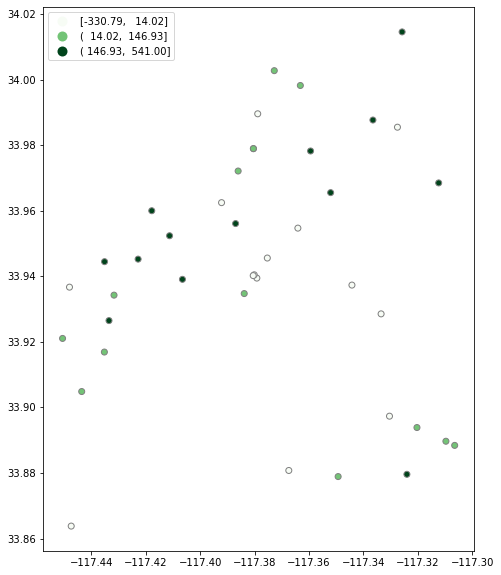

In [55]:
rusd_pts.plot(column='D_RESP_2', cmap='Greens', scheme='Quantiles', k=3,edgecolor='grey', 
                legend=True)

In [56]:
EJ_RUSD.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

<AxesSubplot:>

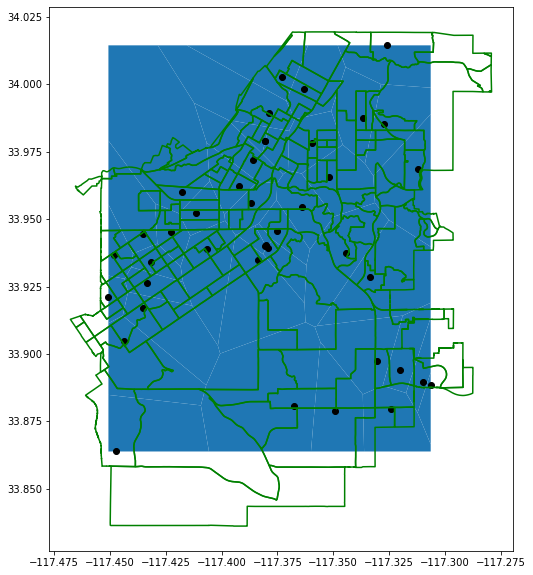

In [57]:
base = EJ_RUSD.geometry.boundary.plot(edgecolor='green')
schools_vd.plot(ax=base)
rusd_pts.plot(ax=base, color='black')

In [58]:
schools_vd, school_cents = lps.cg.voronoi_frames(cents, clip = EJ_RUSD.unary_union)

<AxesSubplot:>

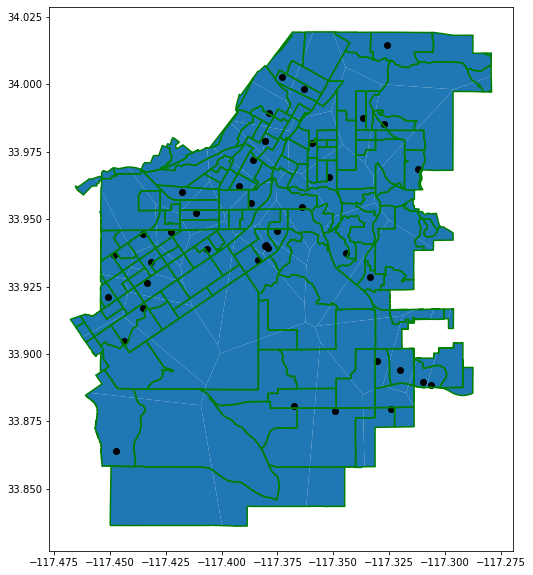

In [59]:
base = EJ_RUSD.geometry.boundary.plot(edgecolor='green')
schools_vd.plot(ax=base)
rusd_pts.plot(ax=base, color='black')

<AxesSubplot:>

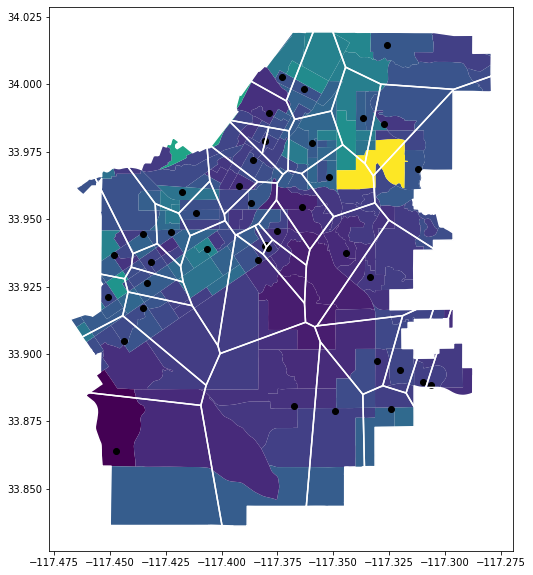

In [60]:
base = EJ_RUSD.plot(column='D_RESP_2')
schools_vd.geometry.boundary.plot(ax=base, edgecolor='white')
rusd_pts.plot(color='black', ax=base)

In [61]:
RESP = tob.area_weighted.area_interpolate(source_df=EJ_RUSD,
                                           target_df=schools_vd,
                                           intensive_variables=['D_RESP_2'])

Source and target dataframes have different crs. Please correct.


In [62]:
RESP

In [63]:
base = RESP.plot(column='D_RESP_2')
rusd_pts.plot(ax=base, color='black')

AttributeError: 'NoneType' object has no attribute 'plot'

In [ ]:
x = EJ_RUSD.to_crs(epsg=4269)
gdf_proj = x.to_crs(EJ_RUSD.crs)
gdf_proj.head()

In [ ]:
boundary_shape = cascaded_union(x.geometry)
coords = points_to_coords(gdf_proj.geometry)

In [ ]:
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)

In [ ]:
base = EJ_RUSD.plot(column='D_RESP_2', legend=True)
rusd_pts.plot(color='WHITE', ax=base)

In [64]:
schools_resp = gpd.sjoin(EJ_RUSD, schools_vd, how='left',op='within')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: None

  """Entry point for launching an IPython kernel.


In [65]:
schools_resp

,D_RESP_2,geometry,index_right
0,268.925031,"POLYGON ((-117.35750 33.99337, -117.35741 33.9...",NaN
1,96.574481,"POLYGON ((-117.36868 33.98814, -117.36845 33.9...",NaN
2,248.739003,"POLYGON ((-117.37502 34.00081, -117.37484 34.0...",NaN
3,446.902269,"POLYGON ((-117.37638 34.01055, -117.37622 34.0...",NaN
4,146.929484,"POLYGON ((-117.37605 34.00218, -117.37603 34.0...",NaN
...,...,...,...
169,-66.298475,"MULTIPOLYGON (((-117.30179 33.88744, -117.2998...",NaN
170,121.879223,"POLYGON ((-117.31320 33.94256, -117.31258 33.9...",NaN
171,96.819742,"POLYGON ((-117.31843 33.95449, -117.31839 33.9...",38.0
172,0.914070,"POLYGON ((-117.30941 33.94511, -117.30939 33.9...",38.0
